In [2]:
from BertFineTuning.data_utils import *
from BertFineTuning.model import *
from pytorch_transformers.optimization import AdamW

In [3]:
BFT=BertFineTuning()

In [4]:
BFT.criterion=nn.CrossEntropyLoss()
BFT.optimizer = AdamW(BFT.parameters_main)
BFT.scheduler=torch.optim.lr_scheduler.MultiStepLR(BFT.optimizer, milestones=[])

In [4]:
ml=MultiLoader()

In [ ]:
BFT.train(model_config,ml.bert_train_split,ml.bert_valid_split,epochs=100,print_every=100,validate_at_epoch=0)

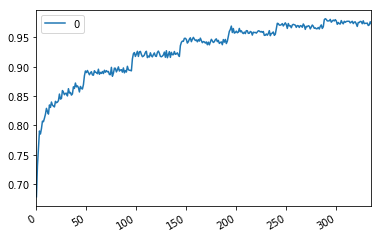

In [5]:
pd.DataFrame.from_dict([item.ACC[1] for i,item in enumerate(BFT.cm_train)]).plot(subplots=True);

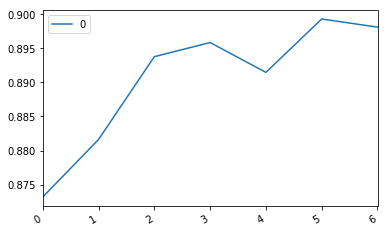

In [6]:
pd.DataFrame.from_dict([item.ACC[1] for i,item in enumerate(BFT.cm_test)]).plot(subplots=True);

In [7]:
[item.ACC[1] for i,item in enumerate(BFT.cm_test)]

[0.8731788161377297,
 0.8816137729735078,
 0.8937714893511762,
 0.8958493086303708,
 0.8914710465777822,
 0.8992999727904618,
 0.8981126474880649]

In [5]:
BFT.save_folder

'D:\\GitHub\\BertFineTuning\\checkpoints'

In [7]:
BFT.load_checkpoint(BFT.save_folder+'\checkpoint7.pth')

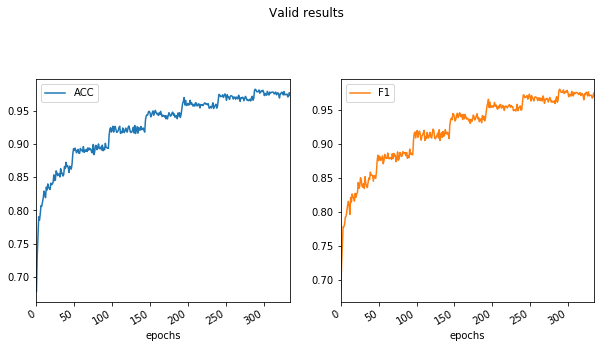

In [53]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1]] for i,item in enumerate(BFT.cm_train)])
df.columns=['ACC','F1']
df.index.name='epochs'
df.plot(subplots=True,figsize=(10,10),layout=(2,2),title='Valid results');

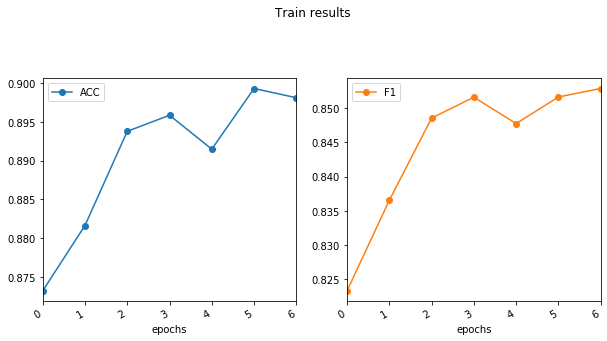

In [54]:
df=pd.DataFrame.from_dict([[item.ACC[1],item.F1[1]] for i,item in enumerate(BFT.cm_test)])
df.columns=['ACC','F1']
df.index.name='epochs'
df.plot(subplots=True,figsize=(10,10),layout=(2,2),marker='o',title='Train results');